## This notebook sets out to summarize and codify (in Python) some of the efforts presented in the paper: "Dynamic Pricing and Demand Learning with Limited Price Experimentation" by Cheung, Wang Chi, et al.

This paper introduces a solution to a dynamic pricing problem where the demand function is not known. The suggestion here is that we can use price experimentation to as a demand learning tool. The paper outlines that most other literature related to this subject only considers no constraints on price changes, which in real life there are often business contraints which inhibit the ability to run extensive pricing experiments.

In the introduction we're introduced with the usecase for which the authors intend to test this methodology, the setting for this is the large online e-commerce marketplace Groupon. The nature of Groupons business means that when launching new deals the business is faced with a high level of demand uncertainty, this being due to new products having no previous sales data that can be used for forecasting demand. This setting allows itself nicely to dynamic demand learning, that is learning demand through real time sales data once the deal has been launched.

Typically in scenarios when the relationship between price and demand is unknown, experiementation can be used to learn demand. The paper then outlines that the approach here is to consider a dynamic pricing model where the exact demand function is unknown but is believed to be contained in a set of possible demand functions $\Phi = \{d_1,...,d_K\}$.

### Problem Definition/Business Details
-  Groupon is a large ecom. market place where customers can purchase discount deals from local merchants such as restaurants, spas and house cleaning serivices etc.
-  Revenue from deals is split between merchants and Groupon.
-  Market place is dynamic, 1000's of new deals landing everyday.
-  Groupon is faced with a high level of demand uncertainty mainly because newly launched deals have no previous sales data that can be used for demand forcasting.
-  This challenge presents an opportunity for Groupon to learn about customer demand using real time sales data after deals have been launched so as to obtain more accurate demand estimations.
-  In general when the underlying relationship between demand and price is unknown a priori, price experimentation can be used for demand learning.
-  Here we consider a DPM where the exact demand function is unknown but belongs to a finite set of possible demand functions or demand hypothesis.
-  The seller faces a exploration-exploitation tradeoff between actively adjusting price to gather demand information and optimizing price for revenue maximization.

### Previous Work
-  DP (dynam. pricing) under a finite set of demand hypotheses has previously been considered. Prev. efforts (unlike this approach) focus on customized pricing, where price is changed for every arriving customer. 
-  For eg. the pricing of financial services such as consumer and auto loans, where sellers can quote a different rate for each customer, however, for ecom. sellers like Groupon, charging a different price for each arriving customer is impossible either because the implmentation constraints, negative customer response, or fear for confusing their customer.

The paper states Groupon expressed a preference to use as few price changes as possible for each deal. Motivated by this practical business constraint on price exp., the model in this paper includes an explicit constraint on the number of price changes during the sales horizon. We quantify the impact of this constraint on the sellers revenue using __regret__, defined as the gap between the revenue of a clairvoyant who has full information on the demand function and the revenue achieved by a seller facing unknown demand.

### Regret
-   One main finding in the paper is a characterization of regret as a number of price changes. When there are $T$ periods in the sales horizon, the paper proposes a pricing policy with at most $m$ price changes, whose regret is bounded by $O(log^{(m)}T)$, or $m$ iterations of the logarithm.
-  Furthermore, it proves that the regret of any non-anticipating pricing policy, a policy where current price does not depend on future demands, is lower bounded by $\Omega(log^{(m)}T)$, thus the regret bound achieved by the proposed pricing policy is tightened up to a constant factor.
-  A natural question is how frquently one needs to change price to achieve a constant regret. Prev. work showed that a semi-myopic policy can achieve a constant regret, but the policy requires changing price for every time period. To answer this question, we show that a modified version of our algorithm with no more than $O(log*T)$ price changes, where $log*T$ is the smallest number $m$ such that the $log^{(m)}T \leq 1$, achieves a constant regret.
-  Interestingly, while the value $log*T$ is unbounded when $T$ increases, the growth rate is extremely slow. For example, if the number of time periods T is less than 3,000,000 we have $log*T \leq 3$.

This characterization of the regret bound has two important implications. First, imposing a price change constraint always incurs a cost on revenue, since the seller cannot achieve a constant regret using any finite number of price changes. Second, the incremental effect of price changes decreases quickly. The first price change decreases regret from $O(T)$ to $O(logT)$; each additional price change there after compounds a logarithm to the order of regret. As a result, the first few price changes generate most of the benefit of dynamic pricing.

### Problem Formulation
-  We consider a seller offering a single product with unlimited supply for $T$ periods.
-  The set of allowable prices is denoted by $P$
-  In the $t^{th}$ period, $(t=1, ..., T)$, the seller offers a unit price $P_{t} \in P$.
-  Observes a customer demand $X_t$, i.e. the number of units purchased by customers.
-  Given $P_t = p$, the distribution of $X_t$ is solely determined by price $p$ and is independent of previous sales history $X_1, ...., X_{t-1}$.
-  We use $D(p) ~ X_t$ to denote a random variable distributed as $X_t$ given $P_t = p$.
-  The corresponding __mean demand function__ $d: P \to \mathbb{R}_+$ is defined as $d(p) = \mathbb{E}[D(p)]$

The distribution of $D(p)$ is unknown to the seller, however, the seller knows that the distribution belongs to a finite set of _demand models_, or demand distributions as a function of $p$. 

The demand models are indexed by $i=1, ..., K$. Let $\mathbb{P}_i (.)$ and $\mathbb{E}_i (.)$ be the probability measure and expectation under demand model _i_. In particular, the mean demand function $d(p)$ belongs to a finite set of $K$ demand functions, denoted by $\Phi = {d_1(p), ..., d_K(p)}$, where $d_i(p)=\mathbb{E}_i[D(p)]$.

For each demand function $d_i \in \Phi$, $(i=1,...,K)$, the expected revenue per period is $r_i(p)=pd_i(p)$(price * demand(given the price)). We also denote the optimal revenue for demand function $d_i$ by $r^{*}_i = max_{p \in P}r_i(p)$ and an optimal price by $p^{*}_i \in argmax_{p \in P}r_i(p)$. The seller does not necessarily know the distribution of demand model $i$ apart from the mean $d_i(p)$.

For all $p \in P$ and $i=1,...,K$, the probability distribution of $D(p)$ is assumed to be _light-tailed_ with parameters $(\sigma, b)$, where $\sigma, b > 0$. 

That is, we have $\mathbb{E}_i[e^{\lambda(D(p)-d_i(p))}] \leq exp(\lambda^2 \sigma^2 /2)$ for all $|\lambda|< 1/b$. 

Note that the class of light-tailed distributions includes sub-Gaussian distributions. Some common light-tailed distributions include normal, Poisson and Gamma distributions, as well as all distributions with bounded support, such as binomial and uniform distributions.

#### Nomenclature
-  __$T$__: time periods.
-  __$m$__ price changes during $T$ periods.
-  __$K$__: finite set of __$K$__ demand functions
-  __$\mathbb{P}^{\pi}_i (.)$, $\mathbb{E}^{\pi}_i (.)$__ the probability measure and expectation induced by policy $\pi$ if the underlying demand model is $i$.
-  $\pi$ is a non-anticipating pricing policy if the price $P_t$ offered at period _t_ is determined by the realized demand $(X_1,...,X_{t-1})$ and previous prices $(P_1,...,P_{t-1})$, but does not depend on future demand.
-  __mPC__: m-price change.

### The data used here is from https://www.kaggle.com/olistbr/brazilian-ecommerce, very brief data prep can be found in the EDA notebook in this repo.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

df = pd.read_csv('merged.csv')
df.head()

,product_id,price,orders,product_category_name_english
0,aca2eb7d00ea1a7b8ebd4e68314663af,69.9,404,furniture_decor
1,aca2eb7d00ea1a7b8ebd4e68314663af,75.0,116,furniture_decor
2,aca2eb7d00ea1a7b8ebd4e68314663af,89.9,5,furniture_decor
3,aca2eb7d00ea1a7b8ebd4e68314663af,109.9,2,furniture_decor
4,99a4788cb24856965c36a24e339b6058,89.9,351,bed_bath_table


### Get the count of sales of each item at each price it's been offered for. We are in no way properly preparing or normalizing this data which we definitely should, but the purpose of this notebook is more to demonstrate the algorithm development.

In [2]:
cnts = pd.DataFrame(df.product_id.value_counts()).reset_index()
cnts.columns = ['product_id', 'price_changes']
df = df.merge(cnts, on='product_id')
df.head()

,product_id,price,orders,product_category_name_english,price_changes
0,aca2eb7d00ea1a7b8ebd4e68314663af,69.9,404,furniture_decor,4
1,aca2eb7d00ea1a7b8ebd4e68314663af,75.0,116,furniture_decor,4
2,aca2eb7d00ea1a7b8ebd4e68314663af,89.9,5,furniture_decor,4
3,aca2eb7d00ea1a7b8ebd4e68314663af,109.9,2,furniture_decor,4
4,99a4788cb24856965c36a24e339b6058,89.9,351,bed_bath_table,7


### Here's a nice example of why we should normalize and properly prepare this data... The demand is significantly higher at the highest price. So there are many things that could be the reason why, the most obvious and simple explanation is that this item has simply been for sale longer at the higher price. The data we are using is not taken form a controlled pricing experiment, and without normalizing and vetting there would be plenty of issues we could delve into (which I might do at a later date).

In [3]:
df.loc[df.product_id == '99a4788cb24856965c36a24e339b6058']

,product_id,price,orders,product_category_name_english,price_changes
4,99a4788cb24856965c36a24e339b6058,89.90,351,bed_bath_table,7
5,99a4788cb24856965c36a24e339b6058,86.90,70,bed_bath_table,7
6,99a4788cb24856965c36a24e339b6058,79.90,35,bed_bath_table,7
7,99a4788cb24856965c36a24e339b6058,84.00,16,bed_bath_table,7
8,99a4788cb24856965c36a24e339b6058,74.00,10,bed_bath_table,7
9,99a4788cb24856965c36a24e339b6058,83.79,4,bed_bath_table,7
10,99a4788cb24856965c36a24e339b6058,86.00,2,bed_bath_table,7


In [4]:
df.groupby('product_category_name_english').agg(['mean', 'count', 'std'])

price                     \
                                                mean count          std   
product_category_name_english                                             
agro_industry_and_commerce                410.255567    97   538.255345   
air_conditioning                          203.048082   146   211.626804   
art                                       167.633514    74   748.445516   
arts_and_craftmanship                      68.932000    20    78.133751   
audio                                     146.531748   103   149.363011   
auto                                      148.146609  2212   218.185921   
baby                                      163.233112  1205   274.191281   
bed_bath_table                            107.229579  3754   110.490911   
books_general_interest                     68.903992   258    93.979297   
books_imported                             92.639118    34   122.015003   
books_technical                            76.798806   134    65.719865   
cds_dvds_musicals                          55.000000     2    14.142136   
christmas_supplies                         57.206714    70    65.353536   
cine_photo                                132.223158    38   164.851609   
computers                                1289.859474    57  1082.063378   
computers_accessories                     150.128553  2336   237.366658   
consoles_games                            176.512796   447   277.681473   
construction_tools_construction           173.834250   480   268.584681   
construction_tools_lights                 140.042900   100   181.419563   
construction_tools_safety                 263.419808   104   412.812873   
cool_stuff                                202.505377  1155   275.933580   
costruction_tools_garden                   96.856589   129   165.928237   
costruction_tools_tools                   165.965217    46   322.466654   
diapers_and_hygiene                        52.972667    15    35.351410   
drinks                                     69.911495   107    77.123111   
dvds_blu_ray                               79.234510    51   221.193591   
electronics                               100.437061   718   200.020095   
fashio_female_clothing                     66.294483    29    44.878672   
fashion_bags_accessories                   87.141023   948   126.730562   
fashion_childrens_clothes                  79.976000     5    33.191141   
fashion_male_clothing                      86.510825    97    60.757683   
fashion_shoes                              87.016683   199    62.885204   
fashion_sport                              82.868095    21    54.027968   
fashion_underwear_beach                    85.943091    55    53.395052   
fixed_telephony                           206.828538   130   348.841313   
flowers                                    34.783810    21    17.752283   
food                                       69.933730   126    50.503639   
food_drink                                 53.616899   129    82.759007   
furniture_bedroom                         192.787222    54   125.761200   
furniture_decor                           103.174491  3075   112.389714   
furniture_living_room                     153.477093   227   139.523897   
furniture_mattress_and_upholstery         182.290000    12   124.500449   
garden_tools                              211.048041   970   359.038634   
health_beauty                             149.775894  3220   226.345659   
home_appliances                            97.251329   429   156.726624   
home_appliances_2                         491.933937   127   529.711666   
home_comfort_2                             87.554000     5    82.376583   
home_confort                              185.431319   144   137.928750   
home_construction                         159.299053   264   170.839759   
housewares                                 99.817869  2919   185.043902   
industry_commerce_and_business            225.629800   100   387.546841 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faaf94c5e48>]],
      dtype=object)

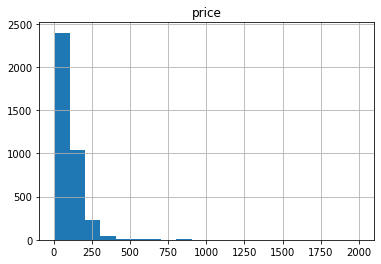

In [5]:
df.loc[(df.product_category_name_english == 'bed_bath_table')].hist(column='price', bins=20)

### A bit of a long tail on the distribution of prices for bed_bath_table items.

### We also need a function that will help us create a linear demand function for each item:

In [6]:
def create_demand_func(x, y):
    X = np.vstack([x, np.ones(len(x))]).T
    m, b = np.linalg.lstsq(X, y, rcond=None)[0]
    return m, b

### Now, we would definitely want to do more intelligent data preparation, here we are just throwing all items in the category into generate demand functions, but if we had item attibutes where we could then only select similar items that would of course give us more accurate demand functions to what we might be looking for.

### We are going to retain prices (xs), orders (ys), gradients (ms), biases (bs) and predicted demand (d_p1) using the demand functions we generate from each given product (linear function fit between price and orders).

In [7]:
xs, ys = [], []
ms, bs = [], []
d_p1 = []

# Selection of products that have at least 2 price changes (needed for demand function).
items = df.loc[(df.product_category_name_english == 'bed_bath_table') & (df.price_changes >= 2) & (df.price < 250)]

# The price we're hoping to launch the new product at.
initial_price = items.price.mean()

# Randomly split the product ids - our data has variable # of prices/product, 
# so splitting the df might place some of the same product in different splits.. not what we want.
trainids, testids = train_test_split(pd.DataFrame({'product_id': list(set(items['product_id']))}), random_state=2)

# Iterate through our train items, create demand functions and store; 
# x - prices, y - demand(# of orders)
# m - gradient of our linear demand fuction (y = mx + b -> d(p) = mp + b)
# b - the bias term in our linear function.
for item in set(list(trainids['product_id'])):
    samp = items.loc[items.product_id == item]
    if not samp.empty:
        x = np.array(list(samp['price']))
        y = np.array(list(samp['orders']))
        m, b = create_demand_func(list(samp['price']), list(samp['orders']))
        # Given the lack of data prep. we'll enforce this restriction.
        if -15 < m*initial_price + b < 15 and -3 < m < 3:
            xs.append(x)
            ys.append(y)
            ms.append(m)
            bs.append(b)
            d_p1.append(m*initial_price + b)

In [8]:
items.shape

(1184, 5)

In [40]:
items.orders.mean(), items.price.mean()

(4.706925675675675, 96.54322635135135)

### Now, let's check out those linear demands, plotting price and predicted demand (at our initial starting price).

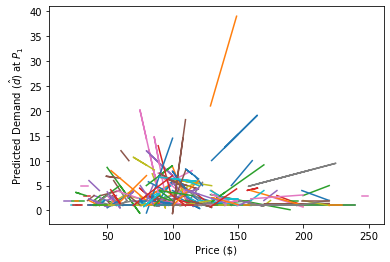

In [24]:
for i in range(len(xs)):
    x, y = xs[i], ys[i]
    m, b = ms[i], bs[i]
    plt.plot(x, m*x + b)
plt.xlabel("Price ($)")
plt.ylabel("Predicted Demand ($\hat{d}$) at $P_1$")
plt.show()

### Lets check out predicted demand vs our demand gradient.

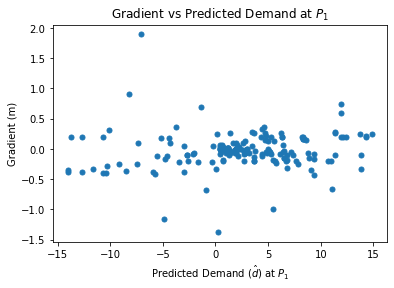

In [25]:
plt.plot(d_p1, ms, 'o', markersize=5)
plt.title('Gradient vs Predicted Demand at $P_1$')
plt.xlabel("Predicted Demand ($\hat{d}$) at $P_1$")
plt.ylabel("Gradient (m)")
plt.show()

### Now that we have our slope and predicted demand at $P_1$ we can now run our clustering alogrithm to generate cluster centers. First we'll need to prepare our data, we have already split our data into training and test sets (based off product IDs). We have used our training data to generate our demand functions. For the test set we are going to obtain two prices for each item $p_1, p_2$. The best way to validate the optimal value of __$K$__ is to use CV. To do this we'll use one of the prices ($p_1$) to identify the best of the $k$ cluster center generated functions which produces the closest estimate to the observed demand. We then use function to predict the demand at $p_2$ then record the error between predicted and observed demand in order to find the ideal number of $k$.

In [12]:
def recs_min_max(dfd):
    '''
    Function that returns a list of min, max prices and demands.
    :param dfd: Pandas DataFrame containing price/demand data.
    '''
    records = []
    for i in set(list(dfd['product_id'])):
        sel = items.loc[items.product_id == i]
        minn, minnd, maxx, maxxd = float('inf'),float('inf'),float('-inf'),float('-inf')
        for idx, r in sel.iterrows():
            if r[1] < minn:
                minn, minnd = r[1], r[2]
            if r[1] > maxx:
                maxx, maxxd = r[1], r[2]
        if minn != maxx:
            records.append([i, minn, minnd, maxx, maxxd])
    return records

In [13]:
def recs(dfd):
    '''
    Function that returns a list of median and max prices and demands.
    :param dfd: Pandas DataFrame containing price/demand data.
    '''
    records = []
    for i in set(list(dfd['product_id'])):
        t = items.loc[items.product_id == list(trainids['product_id'])[2]].sort_values('price')
        l = len(t)
        ps = list(t['price'])
        ds = list(t['orders'])
        if l >= 3:
            mid = l // 2
            records.append([i, ps[mid],ds[mid], ps[l-1], ds[l-1]])
        else:
            records.append([i, ps[0],ds[0], ps[1],ds[1]])
    return records

In [14]:
# Get records.
records = recs(testids)

### Now with the test set records prepared, we can run our process to use our clustering alogrithm and determine the optimal $k$, similar as we would if we were running the elbow method in an unsupervised clustering task. To determine $k$ we'll look for the elbow point when we plot the MSE - the mean squared difference between observed and predicted demand, where we calculate demand by $d_i(p) = x_i + y_i(P_1 - p)$. This will tell us the optmial number of clusters to use when we run our pricing experiment.

### The process here:
1.  Desired output:
  -  $k$, optimal # of clusters so we can generate a set of demand functions $\Phi = \{d_1,...,d_K\}$.
3.  __for__  k in range(1, max_number_clusters):
4.  &nbsp;&nbsp;&nbsp;&nbsp; Fit kmeans to our training set.
5.  &nbsp;&nbsp;&nbsp;&nbsp; Choose an index $i_{\ell} \in \{1,...,K\}$ which solves: $ \displaystyle \min_{i \in \{1,...,K\}} | D_{i_1} - d_i(p_{i_1})|$.
6.  &nbsp;&nbsp;&nbsp;&nbsp; Calculate MSE of $(D_{i_2} - d_{i_{\ell}}(p_{i_2}))^2$
7.  Choose optimal $k$

In [15]:
X = np.array([x for x in zip(d_p1, ms)])
cluster_errors = []

for k in range(1, 25):
    kmeans = KMeans(n_clusters=k, random_state=2).fit(X)
    demand_error = 0
    
    x = [x[0] for x in kmeans.cluster_centers_]
    y = [x[1] for x in kmeans.cluster_centers_]
    
    for id, price_1, demand_1, price_2, demand_2 in records:
        min_error = float("inf")
        for i in range(k):
            error = abs(demand_1 - (x[i] + (y[i]*initial_price + y[i]*price_1)))
            if error < min_error:
                min_error = error
                idx = i
        demand_error += (demand_2 - (x[idx] + (y[idx]*initial_price + y[idx]*price_2)))**2
    cluster_errors.append(demand_error/len(records))

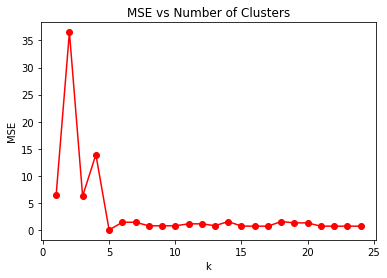

In [16]:
plt.plot(range(1, 25), cluster_errors, 'ro-')
plt.title('MSE vs Number of Clusters')
plt.xlabel("k")
plt.ylabel("MSE")
plt.show()

### Choosing a $k$ too large will result in an overfit solution, we want to pick something around the elbow. Now we have $k$, we generate our cluster centers.

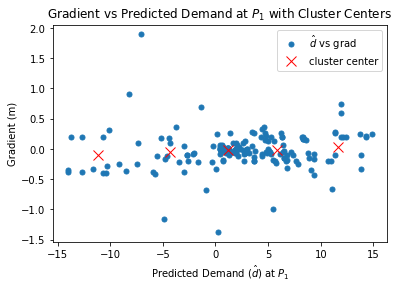

In [29]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
x = [x[0] for x in kmeans.cluster_centers_]
y = [x[1] for x in kmeans.cluster_centers_]

plt.plot(d_p1, ms, 'o', label='$\hat{d}$ vs grad', markersize=5)
plt.plot(x, y, 'rx', label='cluster center', markersize=10)
plt.title('Gradient vs Predicted Demand at $P_1$ with Cluster Centers')
plt.xlabel("Predicted Demand ($\hat{d}$) at $P_1$")
plt.ylabel("Gradient (m)")
plt.legend()
plt.show()

### Cluster centers $(x_i, y_i)$ that are displayed in the chart above. These cluster centers give us the information we need for generalize demand functions: $d_i(p) = x_i + y_i(P_1 - p)$

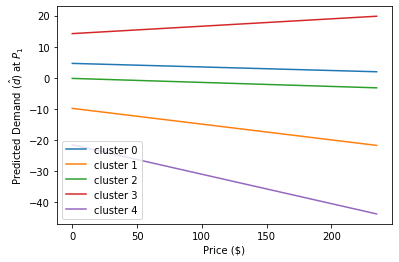

In [30]:
mn, mx = items.price.min(), items.price.max()
for i in range(len(x)):
    ps = []
    for p in range(int(mn), int(mx)):
        ps.append(x[i] + (y[i]*initial_price+y[i]*p))
    plt.plot(ps, label=f'cluster {i}')
plt.ylabel("Predicted Demand ($\hat{d}$) at $P_1$")
plt.xlabel("Price ($)")
plt.legend()
plt.show()

### We see some generalized demand patterns here showing that some items are sensitive to price and others not so sensitive. The majority of these generalized demand functions decrease in demand as price increases as we would expect. At the top of our chart items that are robust to price change and as price increases demand is maintained or slightly increases.

### So let's run a quick simulation (I'll aim to provide a more comprehensive verison soon), we'll go with 3 price changes and see how the model reacts to different observed demand which we'll manually enter and see how it changes the price offered. Here we'll also implement the price adjustment rules outlines in the paper (no price increases).

##### ALGORITHM 1. m-change policy __mPC__
1.  INPUT:
  -  A set of demand functions $\Phi = \{d_1,...,d_K\}$.
  -  A discriminative price $P^*_0$.
2.  (Learning) Set $\tau_0 = 0$
3.  __for__ $\ell = 0,...,m-1$ __do__:
4.  &nbsp;&nbsp;&nbsp;&nbsp; __if__ $\log^{(m-\ell)}T=0$ __then__:
5.  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Set $\tau_{l+1}=0$ and $P^*_{l+1}=P^*_{\ell}$
6.  &nbsp;&nbsp;&nbsp;&nbsp; __else__
7.  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; From period $\tau_{\ell} + 1$ to  $\tau_{\ell + 1} := \tau_{\ell} + \lceil M_{\Phi}(P^*_{\ell})\log^{(m-\ell)}T \rceil$, set the offered price as $P^*_{\ell}$.
8.  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; At the end of period $\tau + 1$, compute the sample mean $\overline{X^{\ell}}$ from period $\tau_{\ell} + 1$ to $\displaystyle \tau_{\ell+1}$: 
8.  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\overline{X^{\ell}} :=\displaystyle \frac{\displaystyle \sum_{j=\tau_{\ell}+1}^{\tau_{\ell+1}}X_j}{\tau_{\ell+1} - \tau_{\ell}}$, where $X_j$ = Number of items sold in period $j$.
9.  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Choose an index $i_{\ell} \in \{1,...,K\}$ which solves: $ \displaystyle \min_{i \in \{1,...,K\}} |\overline{X^{\ell}} - d_i(P^*_{\ell})|$.
10. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Set the next offered price as $P^*_{\ell+1} = p^*_{i_{\ell}}$, where $p^*_{i_{\ell}}$ is the optimal price for demand $d_{i_{\ell}}$
11. __end if__
12. __end for__
13. (Earning) From period $\tau_m + 1$ to period $\tau_{m + 1} = T$, set the selling price as $P_m$.

In [41]:
price = initial_price
for r in range(3):
    min_error = float("inf")
    price = initial_price if not price else price
    demand = float(input(f'Demand @ ${round(price, 2)}'))
    for i in range(k):
        d_hat = float(x[i] + (y[i]*initial_price + y[i]*price))
        error = abs(demand - d_hat)
        if error < min_error:
            min_error = error
            idx = i
    price_range = [x for x in range(35, 250, 5)]
    demands = [x[idx] + (y[idx]*initial_price + y[idx]*v) for v in price_range]
    mx = max(demands)
    optimal_idx = demands.index(mx)
    best_price = price_range[optimal_idx]
    print(best_price)
    price = best_price if (best_price < price and \
            abs(price - best_price) < best_price * 0.3) else \
            price - 0.3 * price if best_price < price else price

Demand @ $96.541
35
Demand @ $67.5812
245
Demand @ $67.5845
245


### Full Citation:

```Cheung, Wang Chi, et al. “Technical Note—Dynamic Pricing and
Demand Learning with Limited Price Experimentation.” Operations
Research, vol. 65, no. 6, Dec. 2017, pp. 1722–31.```

In [43]:
import pickle
with open('kmeans.pickle', 'wb') as f:
    pickle.dump(kmeans, f)

In [45]:
trainids.to_csv('train_ids.csv', index=False)

In [46]:
testids.to_csv('test_ids.csv', index=False)